# 고객 이탈 예측 실습 과제

이 노트북은 통신사 고객 이탈 예측 문제를 해결하기 위한 머신러닝 실습 과제입니다.  
의사결정트리(Decision Tree)와 서포트 벡터 머신(SVM)을 활용하며, 의사결정트리는 시각화도 함께 진행합니다.

---

## 📂 데이터셋 다운로드 방법
1. [Kaggle Telco Customer Churn Dataset 링크](https://www.kaggle.com/datasets/blastchar/telco-customer-churn)에 접속합니다.
2. `Download` 버튼을 클릭해 데이터셋을 내려받습니다.
3. 압축을 해제하고 `WA_Fn-UseC_-Telco-Customer-Churn.csv` 파일을 현재 노트북과 같은 폴더에 둡니다.

---

## 🧪 실습 과제 목록


### 🧩 1. 데이터 불러오기 및 확인
- `WA_Fn-UseC_-Telco-Customer-Churn.csv` 파일을 불러오고 `head()`로 데이터를 확인하세요.

In [1]:
# 1. 데이터 불러오기
import pandas as pd
data = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### 🧩 2. 데이터 전처리
- TotalCharges가 문자열로 되어 있는 문제를 해결하고, 결측값을 처리하세요.
- `Churn` 컬럼을 0과 1로 변환하고, `customerID` 컬럼을 제거하세요.
- 범주형 변수들을 원핫 인코딩 처리하세요.
- 훈련용과 테스트용 데이터로 7:3 비율로 분리하세요.

In [2]:
# 2. 전처리
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
data.dropna(inplace=True)
data['Churn'] = data['Churn'].map({'No': 0, 'Yes': 1})
data.drop(columns=['customerID'], inplace=True)
# (원핫 인코딩을 train/test 분리 전에)
data = pd.get_dummies(data)

In [3]:
from sklearn.model_selection import train_test_split
X = data.drop(columns=['Churn'])
y = data['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### 🧩 3. 의사결정트리 모델링 및 시각화
- `DecisionTreeClassifier`를 사용하여 훈련 데이터를 학습하세요.
- `plot_tree()`를 사용하여 트리를 시각화하세요.
- 주요 분기 기준을 해석해보세요.

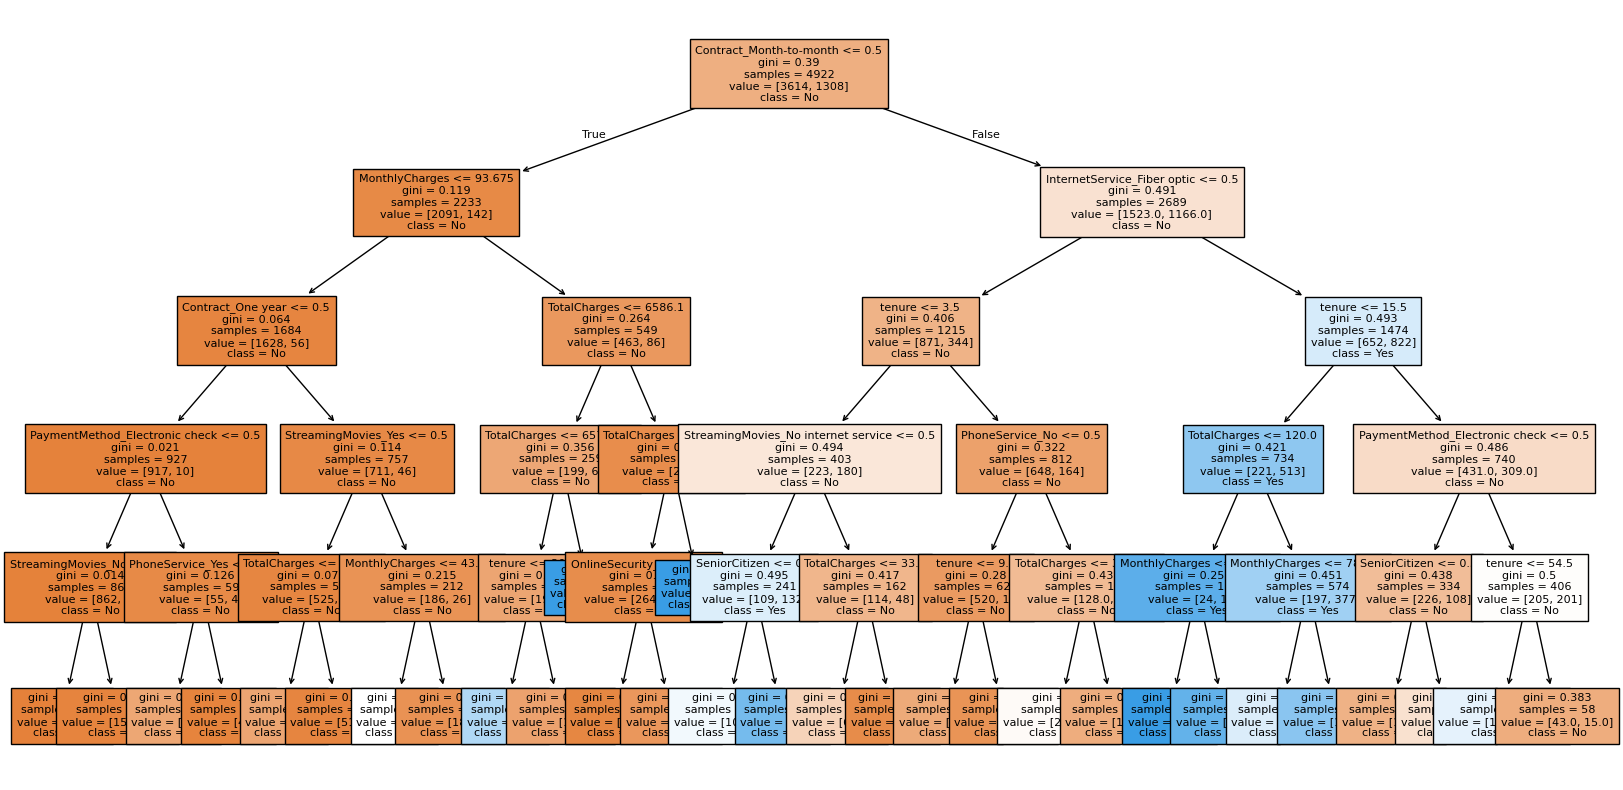

In [4]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
dt_model = DecisionTreeClassifier(random_state=42, max_depth=5)
dt_model.fit(X_train, y_train)

import matplotlib.pyplot as plt
plt.figure(figsize=(20, 10))
plot_tree(dt_model, feature_names=X_train.columns, class_names=['No', 'Yes'], filled=True, fontsize=8)
plt.show()

### 🧩 4. SVM 모델링
- `SVC` 모델을 이용해 이탈 여부를 예측하세요.
- 테스트셋에 대한 예측 결과를 출력하고, `classification_report`를 사용해 평가하세요.

In [ ]:
from sklearn.svm import SVC
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)

Decision Tree Performance:
              precision    recall  f1-score   support

           0       0.86      0.84      0.85      1549
           1       0.59      0.61      0.60       561

    accuracy                           0.78      2110
   macro avg       0.72      0.73      0.72      2110
weighted avg       0.78      0.78      0.78      2110

SVM Performance:
              precision    recall  f1-score   support

           0       0.73      1.00      0.85      1549
           1       0.00      0.00      0.00       561

    accuracy                           0.73      2110
   macro avg       0.37      0.50      0.42      2110
weighted avg       0.54      0.73      0.62      2110



c:\Users\wjdgn\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\wjdgn\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\wjdgn\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### 🧩 5. 모델 성능 비교
- 의사결정트리와 SVM의 평가 지표(`정확도`, `정밀도`, `재현율`)를 비교하세요.
- 어떤 모델이 어떤 상황에서 더 적합한지 분석해보세요.

In [7]:
from sklearn.metrics import classification_report
print("Decision Tree Performance:")
print(classification_report(y_test, dt_model.predict(X_test)))
print("SVM Performance:")
print(classification_report(y_test, y_pred))

Decision Tree Performance:
              precision    recall  f1-score   support

           0       0.86      0.84      0.85      1549
           1       0.59      0.61      0.60       561

    accuracy                           0.78      2110
   macro avg       0.72      0.73      0.72      2110
weighted avg       0.78      0.78      0.78      2110

SVM Performance:
              precision    recall  f1-score   support

           0       0.73      1.00      0.85      1549
           1       0.00      0.00      0.00       561

    accuracy                           0.73      2110
   macro avg       0.37      0.50      0.42      2110
weighted avg       0.54      0.73      0.62      2110



c:\Users\wjdgn\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\wjdgn\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\wjdgn\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### 🧩 6. 사용자 입력 기반 예측 (선택)
- 새로운 고객의 정보를 입력받아 모델이 이탈 가능성을 예측하도록 구성해보세요.

# 부록: 의사결정트리 시각화 예제(iris dataset)

In [1]:
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Prepare the data data
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Fit the classifier with default hyper-parameters
clf = DecisionTreeClassifier(random_state=1234)
model = clf.fit(X, y)

In [ ]:
from sklearn import tree

text_representation = tree.export_text(clf)
print(text_representation)

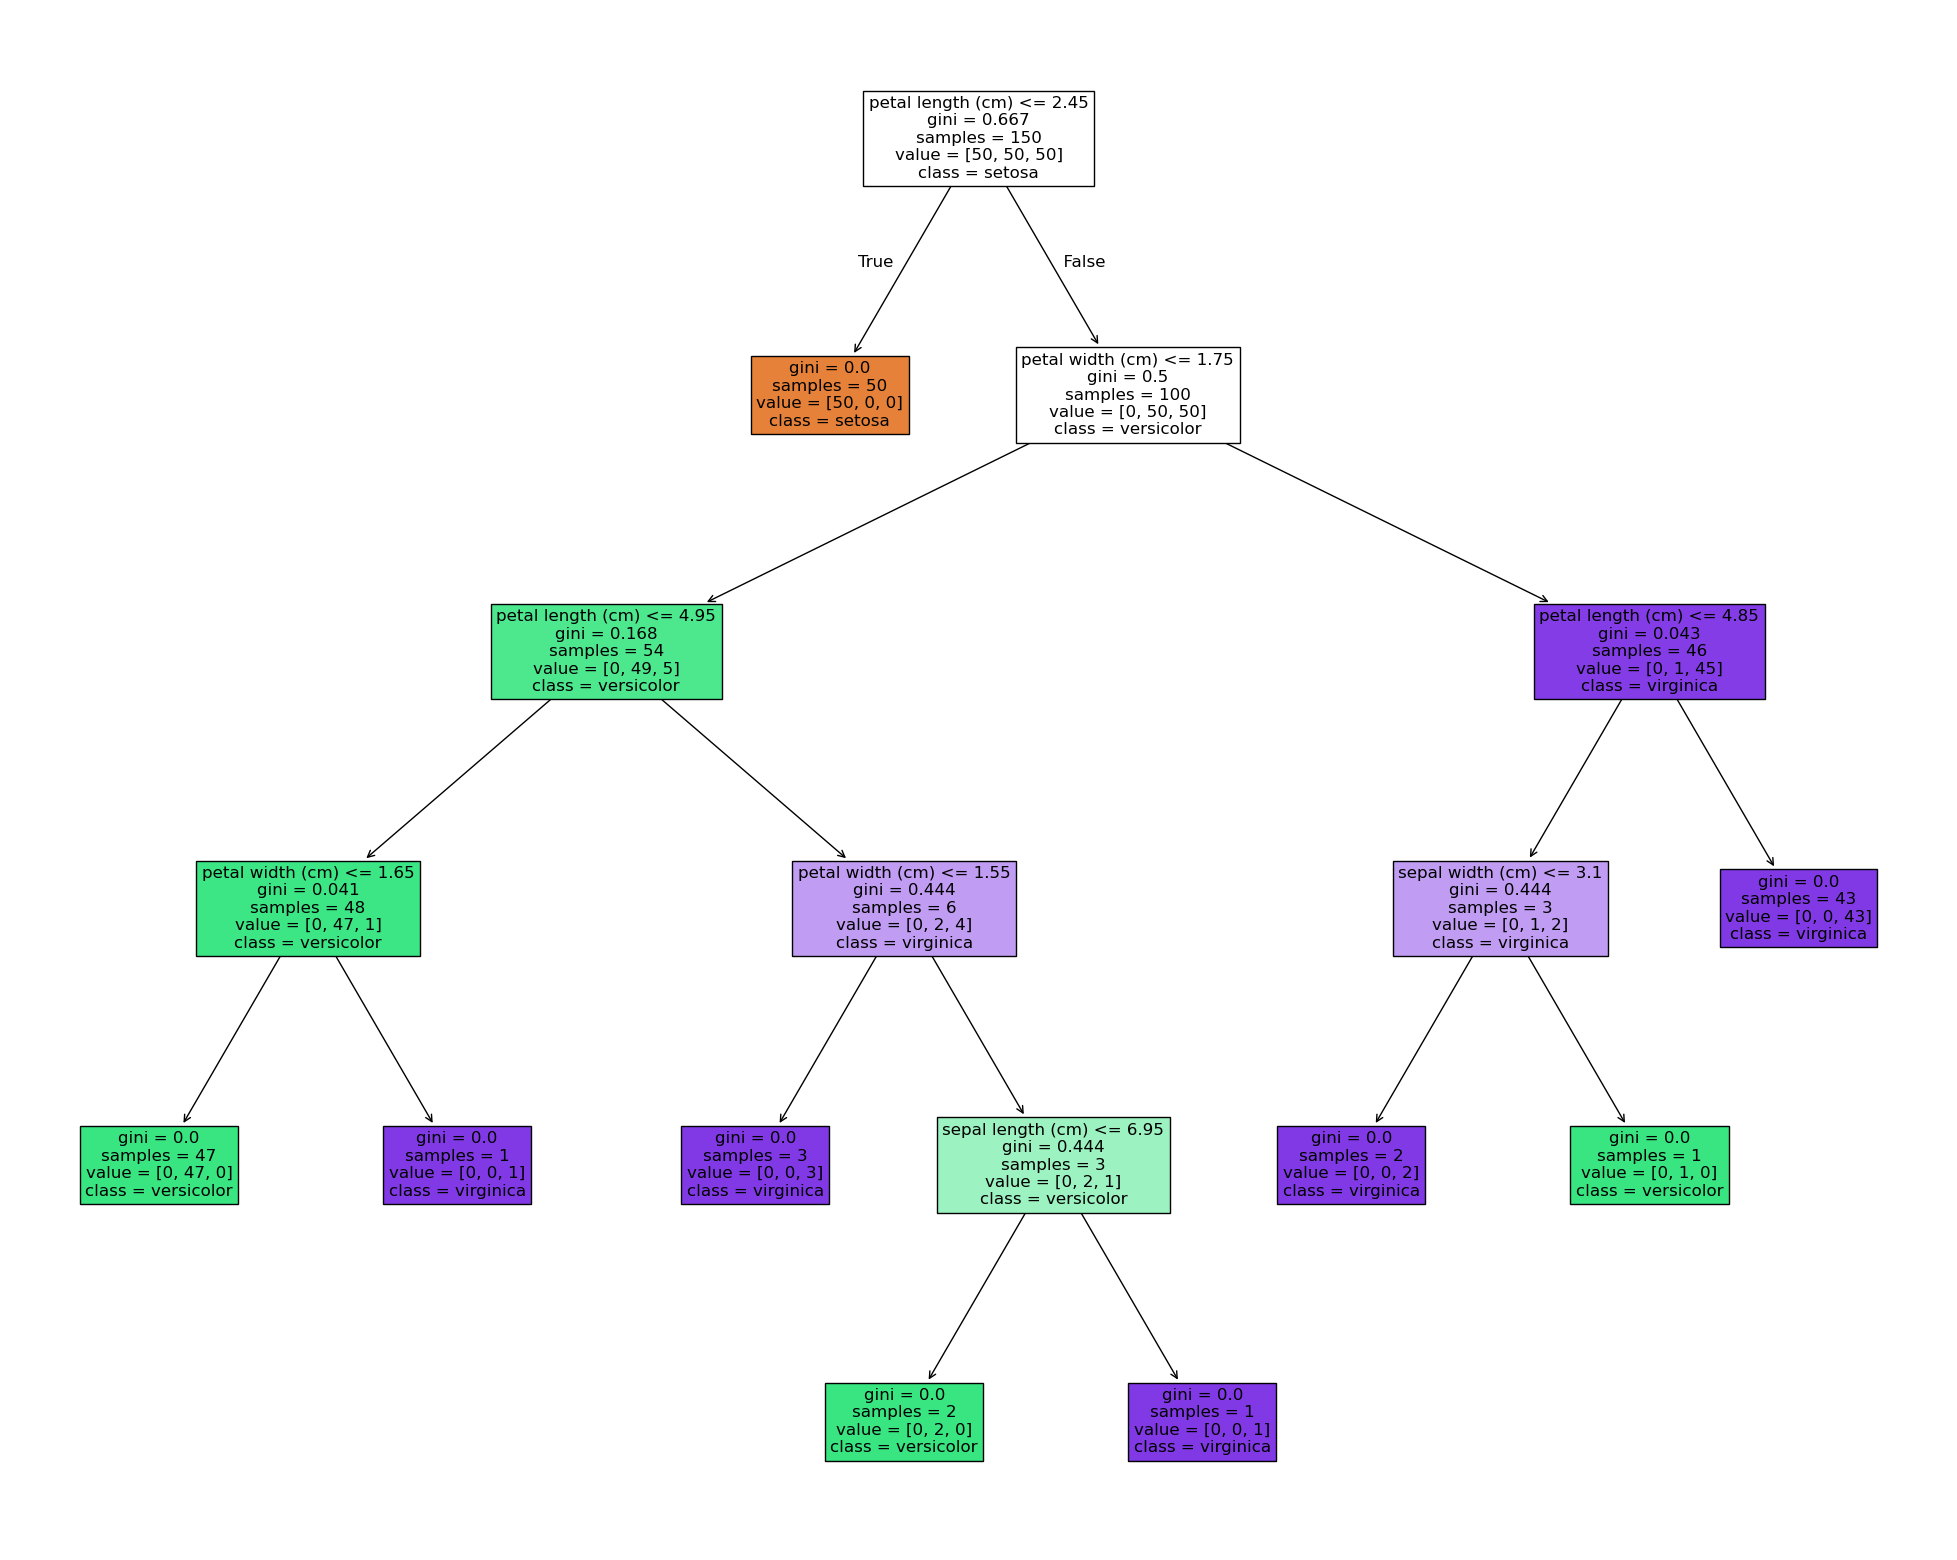

In [6]:
from sklearn import tree

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf,
                   feature_names=iris.feature_names,
                   class_names=iris.target_names,
                   filled=True,
                   fontsize=12)